In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from PIL import Image
import PIL

In [2]:
import os
print("Train Data: ")
for dirpath, dirnames, filenames in os.walk("resized_images/train"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
print("Test Data: ")
for dirpath, dirnames, filenames in os.walk("resized_images/test"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

Train Data: 
There are 2 directories and 0 images in 'resized_images/train'.
There are 0 directories and 4001 images in 'resized_images/train\cats'.
There are 0 directories and 4000 images in 'resized_images/train\dogs'.
Test Data: 
There are 2 directories and 1 images in 'resized_images/test'.
There are 0 directories and 1000 images in 'resized_images/test\cats'.
There are 0 directories and 1000 images in 'resized_images/test\dogs'.


Image Shape (300, 300, 3)


array([[[ 63,  63,  63],
        [ 59,  59,  59],
        [ 58,  58,  58],
        ...,
        [ 61,  62,  66],
        [ 61,  62,  64],
        [ 61,  62,  64]],

       [[ 63,  63,  63],
        [ 59,  59,  59],
        [ 58,  58,  58],
        ...,
        [ 61,  62,  66],
        [ 61,  62,  64],
        [ 61,  62,  64]],

       [[ 63,  63,  63],
        [ 59,  59,  59],
        [ 58,  58,  58],
        ...,
        [ 61,  62,  66],
        [ 61,  62,  64],
        [ 61,  62,  64]],

       ...,

       [[197, 177, 153],
        [202, 182, 158],
        [203, 183, 159],
        ...,
        [140, 113, 102],
        [136, 109,  98],
        [136, 109,  98]],

       [[198, 178, 154],
        [203, 183, 159],
        [204, 184, 160],
        ...,
        [140, 113, 102],
        [140, 113, 102],
        [141, 114, 103]],

       [[197, 177, 153],
        [202, 182, 158],
        [204, 184, 160],
        ...,
        [139, 112, 101],
        [142, 115, 104],
        [145, 118, 107]]

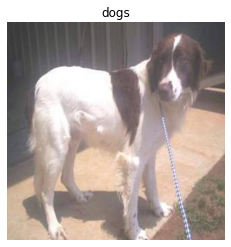

In [3]:
import random
import matplotlib.pyplot as plt
def view_rndm_image(data_set, target_class):
    target_folder = 'resized_images/'+data_set+'/'+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    img = mpimg.imread(target_folder+'/'+random_image[0])
#     print(target_folder+'/'+random_image[0])
#     print(img)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image Shape {img.shape}")
    
    return img
    
    
view_rndm_image(data_set = 'train',target_class = 'dogs')

In [4]:
class_names = os.listdir("resized_images/train")
print(class_names)

['cats', 'dogs']


In [5]:
plt.figure(figsize=(300,300))
for i in range(20):
    plt.subplot(4,5,i+1)
    class_name = random.choice(class_names)
    view_rndm_image(data_set="train",target_class=class_name)

Image Shape (300, 300, 3)
Image Shape (300, 300, 3)
Image Shape (300, 300, 3)
Image Shape (300, 300, 3)
Image Shape (300, 300, 3)
Image Shape (300, 300, 3)
Image Shape (300, 300, 3)
Image Shape (300, 300, 3)
Image Shape (300, 300, 3)
Image Shape (300, 300, 3)
Image Shape (300, 300, 3)
Image Shape (300, 300, 3)
Image Shape (300, 300, 3)
Image Shape (300, 300, 3)
Image Shape (300, 300, 3)
Image Shape (300, 300, 3)
Image Shape (300, 300, 3)
Image Shape (300, 300, 3)
Image Shape (300, 300, 3)
Image Shape (300, 300, 3)


In [6]:
#preparing data
train_dir = "resized_images/train/"
test_dir = "resized_images/test/"

In [7]:
train_datagen = ImageDataGenerator(rescale = 1/255.,rotation_range=0.2,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,target_size=(300,300),batch_size=32,class_mode="categorical")

test_data = val_datagen.flow_from_directory(test_dir,target_size=(300,300),batch_size=32,class_mode="categorical")

Found 8001 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [8]:
model_1 = Sequential([
  Conv2D(16, 3, padding='same', activation='relu', input_shape=(300,300,3)),
  MaxPool2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPool2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(len(class_names), activation='softmax')
])

model_1.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [13]:
history_1 = model_1.fit(train_data,
                    epochs=10,
                    batch_size=32,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/10
251/251 [==============================] - 462s 2s/step - loss: 0.5816 - accuracy: 0.6960 - val_loss: 0.5214 - val_accuracy: 0.7525
Epoch 2/10
251/251 [==============================] - 503s 2s/step - loss: 0.5483 - accuracy: 0.7222 - val_loss: 0.5295 - val_accuracy: 0.7455
Epoch 3/10
251/251 [==============================] - 512s 2s/step - loss: 0.5321 - accuracy: 0.7313 - val_loss: 0.5842 - val_accuracy: 0.7175
Epoch 4/10
251/251 [==============================] - 537s 2s/step - loss: 0.5232 - accuracy: 0.7403 - val_loss: 0.5010 - val_accuracy: 0.7395
Epoch 5/10
251/251 [==============================] - 464s 2s/step - loss: 0.5075 - accuracy: 0.7504 - val_loss: 0.5185 - val_accuracy: 0.7450
Epoch 6/10
251/251 [==============================] - 461s 2s/step - loss: 0.4895 - accuracy: 0.7630 - val_loss: 0.4577 - val_accuracy: 0.7830
Epoch 7/10
251/251 [==============================] - 461s 2s/step - loss: 0.4860 - accuracy: 0.7648 - val_loss: 0.5225 - val_accuracy: 0.7635

In [14]:
model_1.evaluate(test_data)

63/63 [==============================] - 23s 359ms/step - loss: 0.4258 - accuracy: 0.8130


[0.42575693130493164, 0.8130000233650208]

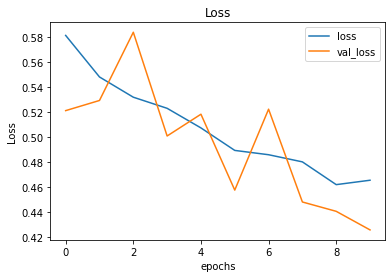

In [15]:
pd.DataFrame(history_1.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss');

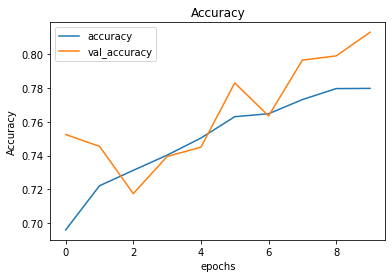

In [16]:
pd.DataFrame(history_1.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy');